## Deadline
Wednesday October 25, 2017 at 11:59PM

## Important Notes
* Make sure you push on GitHub your Notebook with all the cells already evaluated (i.e., you don't want your colleagues to generate unnecessary Web traffic during the peer review)
* Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you plan to implement!
* Please write all your comments in English, and use meaningful variable names in your code.

## Background
In this homework we will extract interesting information from www.topuniversities.com and www.timeshighereducation.com, two platforms that maintain a global ranking of worldwide universities. This ranking is not offered as a downloadable dataset, so you will have to find a way to scrape the information we need!
You are not allowed to download manually the entire ranking -- rather you have to understand how the server loads it in your browser. For this task, Postman with the Interceptor extension can help you greatly. We recommend that you watch this [brief tutorial](https://www.youtube.com/watch?v=jBjXVrS8nXs&list=PLM-7VG-sgbtD8qBnGeQM5nvlpqB_ktaLZ&autoplay=1) to understand quickly how to use it.

## Assignment
1. Obtain the 200 top-ranking universities in www.topuniversities.com ([ranking 2018](https://www.topuniversities.com/university-rankings/world-university-rankings/2018)). In particular, extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total). Some information is not available in the main list and you have to find them in the [details page](https://www.topuniversities.com/universities/ecole-polytechnique-f矇d矇rale-de-lausanne-epfl).
Store the resulting dataset in a pandas DataFrame and answer the following questions:
- Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?
- Answer the previous question aggregating the data by (c) country and (d) region.

Plot your data using bar charts and describe briefly what you observed.

2. Obtain the 200 top-ranking universities in www.timeshighereducation.com ([ranking 2018](http://timeshighereducation.com/world-university-rankings/2018/world-ranking)). Repeat the analysis of the previous point and discuss briefly what you observed.

3. Merge the two DataFrames created in questions 1 and 2 using university names. Match universities' names as well as you can, and explain your strategy. Keep track of the original position in both rankings.

4. Find useful insights in the data by performing an exploratory analysis. Can you find a strong correlation between any pair of variables in the dataset you just created? Example: when a university is strong in its international dimension, can you observe a consistency both for students and faculty members?

5. Can you find the best university taking in consideration both rankings? Explain your approach.

Hints:
- Keep your Notebook clean and don't print the verbose output of the requests if this does not add useful information for the reader.
- In case of tie, use the order defined in the webpage.

In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn
%matplotlib inline

In [2]:
# get the webpage of qs ranking 2018
URL = 'https://www.topuniversities.com/university-rankings/world-university-rankings/2018'
r = requests.get(URL)


In [12]:
# show the header of the web source code
r.text[:1000]

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" version="XHTML+RDFa 1.0" dir="ltr" xmlns:og="http://ogp.me/ns#" xmlns:article="http://ogp.me/ns/article#" xmlns:book="http://ogp.me/ns/book#" xmlns:profile="http://ogp.me/ns/profile#" xmlns:video="http://ogp.me/ns/video#" xmlns:product="http://ogp.me/ns/product#" xmlns:content="http://purl.org/rss/1.0/modules/content/" xmlns:dc="http://purl.org/dc/terms/" xmlns:foaf="http://xmlns.com/foaf/0.1/" xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#" xmlns:sioc="http://rdfs.org/sioc/ns#" xmlns:sioct="http://rdfs.org/sioc/types#" xmlns:skos="http://www.w3.org/2004/02/skos/core#" xmlns:xsd="http://www.w3.org/2001/XMLSchema#" xmlns:schema="http://schema.org/">\n<head profile="http://www.w3.org/1999/xhtml/vocab">\n<meta name="referrer" content="unsafe-url" />\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"UwUCVVVTGwIAV1VX

In [3]:
# use beautifulsoup to extract html
soup = BeautifulSoup(r.text, 'html.parser')

In [4]:
print(soup.title)
print(soup.title.string)

<title>QS World University Rankings 2018 | Top Universities</title>
QS World University Rankings 2018 | Top Universities


In [5]:
all_links = soup.find_all('a')
print('The webpage contains {0} links ...'.format(len(all_links)))

The webpage contains 367 links ...


In [4]:
# get the ranking 
URL = 'https://www.topuniversities.com//sites//default//files//qs-rankings-data//357051.txt'
r = requests.get(URL)

In [31]:
# inspect data
r.text[:300]

'{"data":[{"nid":"294850","url":"\\/universities\\/massachusetts-institute-technology-mit","title":"Massachusetts Institute of Technology (MIT)","logo":"\\u003Cimg src=\\u0022https:\\/\\/www.topuniversities.com\\/sites\\/default\\/files\\/massachusetts-institute-of-technology-mit_410_small_0.jpg\\u0022 alt=\\u00'

In [5]:
URL = 'https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051_indicators.txt'
r = requests.get(URL)

In [6]:
universites_info = r.json()['data'][0:200]

# links
university_links = [BeautifulSoup(university['uni'], 'html.parser').find('a') for university in universites_info]

# name as index
data_qs = pd.DataFrame([university_link.text for university_link in university_links], columns = ['university'])

# rank
data_qs['rank'] = [university['overall_rank'] for university in universites_info]

# country
data_qs['country'] = [university['location'] for university in universites_info]

# region
data_qs['region'] = [university['region'] for university in universites_info]

# number of faculty members (international and total) 
header = 'https://www.topuniversities.com'

web_addresses = [header + university_link.get('href') for university_link in university_links]

university_pages = [requests.get(web_address) for web_address in web_addresses] 

university_details = [BeautifulSoup(page.text, 'html.parser') for page in university_pages] 


# number of students (international and total)

data_qs.head()

,university,rank,country,region
0,Massachusetts Institute of Technology (MIT),1,United States,North America
1,Stanford University,2,United States,North America
2,Harvard University,3,United States,North America
3,California Institute of Technology (Caltech),4,United States,North America
4,University of Cambridge,5,United Kingdom,Europe


In [7]:
def getData(webpage, label):
    try:
        number = (int)(webpage.find('div', class_ = label).find('div', class_ = 'number').text.replace(',',''))
    except AttributeError:
        number = 0
    return number

# number of international students
data_qs['international students'] = [getData(page, 'total inter') for page in university_details]

# number of total students
data_qs['total students'] = [getData(page, 'total student') for page in university_details]

# number of foreign faculty
data_qs['international faculties'] = [getData(page, 'inter faculty') for page in university_details]

# number of total faculty
data_qs['total faculties'] = [getData(page, 'total faculty') for page in university_details]


In [8]:
data_qs.head()

,university,rank,country,region,international students,total students,international faculties,total faculties
0,Massachusetts Institute of Technology (MIT),1,United States,North America,3717,11067,1679,2982
1,Stanford University,2,United States,North America,3611,15878,2042,4285
2,Harvard University,3,United States,North America,5266,22429,1311,4350
3,California Institute of Technology (Caltech),4,United States,North America,647,2255,350,953
4,University of Cambridge,5,United Kingdom,Europe,6699,18770,2278,5490


Which are the best universities in term of ratio between faculty members and students

In [9]:
data_ratio_faculty_students = pd.DataFrame(data_qs[['university', 'country', 'region', 'total faculties','total students']])
data_ratio_faculty_students['ratio(%)'] = data_qs['total faculties']/data_qs['total students']
data_ratio_faculty_students = data_ratio_faculty_students.sort_values('ratio(%)', ascending=False)
data_ratio_faculty_students.head()

,university,country,region,total faculties,total students,ratio(%)
3,California Institute of Technology (Caltech),United States,North America,953,2255,0.422616
15,Yale University,United States,North America,4940,12402,0.398323
5,University of Oxford,United Kingdom,Europe,6750,19720,0.342292
4,University of Cambridge,United Kingdom,Europe,5490,18770,0.292488
16,Johns Hopkins University,United States,North America,4462,16146,0.276353


Which are the best universities in term of ratio of international students

In [10]:
data_ratio_inter_students = pd.DataFrame(data_qs[['university', 'country', 'region', 'international students','total students']])
data_ratio_inter_students['ratio(%)'] = data_qs['international students']/data_qs['total students']
data_ratio_inter_students = data_ratio_inter_students.sort_values('ratio(%)', ascending=False)
data_ratio_inter_students.head()

,university,country,region,international students,total students,ratio(%)
34,London School of Economics and Political Scien...,United Kingdom,Europe,6748,9760,0.691393
11,Ecole Polytechnique Fédérale de Lausanne (EPFL),Switzerland,Europe,5896,10343,0.570047
7,Imperial College London,United Kingdom,Europe,8746,16090,0.543567
199,Maastricht University,Netherlands,Europe,8234,16385,0.502533
46,Carnegie Mellon University,United States,North America,6385,13356,0.478062


(c) faculty/students by country

In [11]:
data_ratio_faculty_students.sort_values(['ratio(%)'], ascending=False).groupby('country').first()

,university,region,total faculties,total students,ratio(%)
country,,,,,
Argentina,Universidad de Buenos Aires (UBA),Latin America,16421,122301,0.134267
Australia,The Australian National University,Oceania,1600,14442,0.110788
Austria,University of Vienna,Europe,3411,45967,0.074205
Belgium,Vrije Universiteit Brussel (VUB),Europe,1792,9284,0.193020
Brazil,Universidade de São Paulo,Latin America,5582,65711,0.084948
Canada,McMaster University,North America,3231,23702,0.136318
Chile,Pontificia Universidad Católica de Chile (UC),Latin America,2260,27003,0.083694
China,Tsinghua University,Asia,5506,36300,0.151680
Denmark,Technical University of Denmark,Europe,2117,8878,0.238455


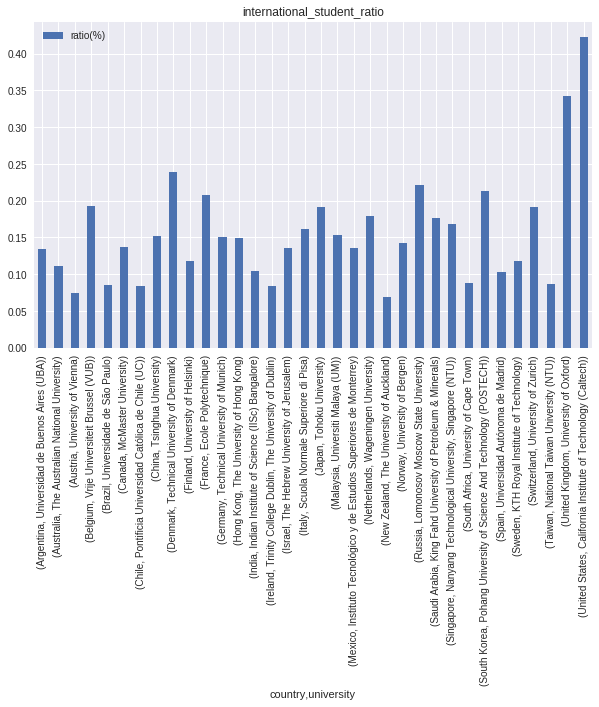

In [12]:
data_ratio_faculty_students.sort_values(['ratio(%)'], ascending=False).groupby('country', as_index = False)\
.first().plot(y='ratio(%)', x=['country','university'], kind='bar',\
              grid=True, figsize=(10, 6), title='international_student_ratio')

(c) international students/total students by country

In [13]:
data_ratio_inter_students.sort_values(['ratio(%)'], ascending=False).groupby('country').first()

,university,region,international students,total students,ratio(%)
country,,,,,
Argentina,Universidad de Buenos Aires (UBA),Latin America,27109,122301,0.221658
Australia,The University of Melbourne,Oceania,18030,42182,0.427434
Austria,University of Vienna,Europe,14468,45967,0.314748
Belgium,Vrije Universiteit Brussel (VUB),Europe,1853,9284,0.199591
Brazil,Universidade Estadual de Campinas (Unicamp),Latin America,966,26572,0.036354
Canada,McGill University,North America,9540,28837,0.330825
Chile,Pontificia Universidad Católica de Chile (UC),Latin America,991,27003,0.036700
China,Peking University,Asia,7090,42136,0.168265
Denmark,Technical University of Denmark,Europe,2098,8878,0.236314


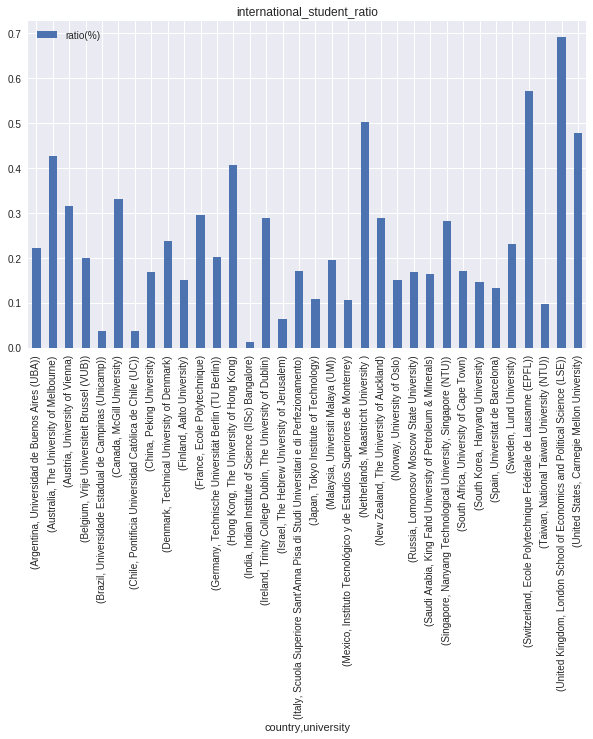

In [14]:
data_ratio_inter_students.sort_values(['ratio(%)'], ascending=False).groupby('country', as_index = False)\
.first().plot(y='ratio(%)', x=['country','university'], kind='bar',\
              grid=True, figsize=(10, 6), title='international_student_ratio')

(d) faculty/student by region

In [15]:
data_ratio_faculty_students.sort_values(['ratio(%)'], ascending=False).groupby('region').first()

,university,country,total faculties,total students,ratio(%)
region,,,,,
Africa,University of Cape Town,South Africa,1733,19593,0.088450
Asia,Pohang University of Science And Technology (P...,South Korea,664,3117,0.213025
Europe,University of Oxford,United Kingdom,6750,19720,0.342292
Latin America,Instituto Tecnológico y de Estudios Superiores...,Mexico,1822,13376,0.136214
North America,California Institute of Technology (Caltech),United States,953,2255,0.422616
Oceania,The Australian National University,Australia,1600,14442,0.110788


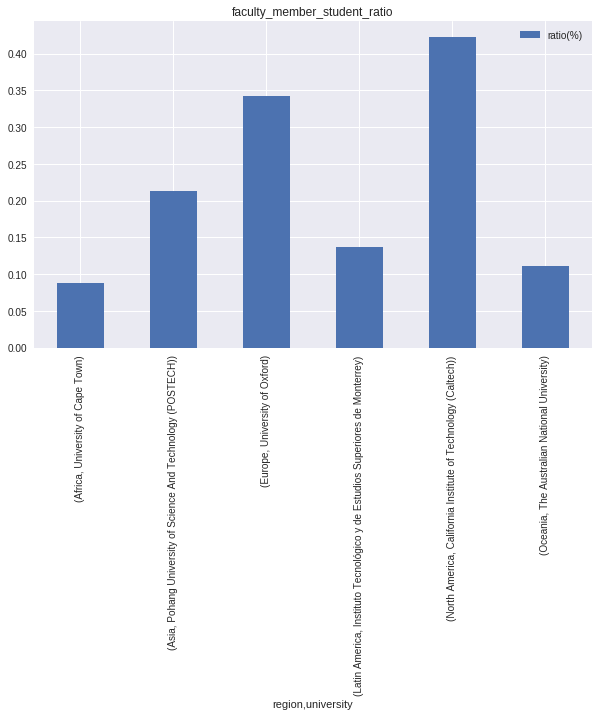

In [16]:
data_ratio_faculty_students.sort_values(['ratio(%)'], ascending=False).groupby('region', as_index = False)\
.first().plot(y='ratio(%)', x=['region','university'], kind='bar',\
              grid=True, figsize=(10, 6), title='faculty_member_student_ratio')


(d) international students/total students by region

In [17]:
data_ratio_inter_students.sort_values(['ratio(%)'], ascending=False).groupby('region').first()

,university,country,international students,total students,ratio(%)
region,,,,,
Africa,University of Cape Town,South Africa,3325,19593,0.169703
Asia,The University of Hong Kong,Hong Kong,8230,20214,0.407144
Europe,London School of Economics and Political Scien...,United Kingdom,6748,9760,0.691393
Latin America,Universidad de Buenos Aires (UBA),Argentina,27109,122301,0.221658
North America,Carnegie Mellon University,United States,6385,13356,0.478062
Oceania,The University of Melbourne,Australia,18030,42182,0.427434


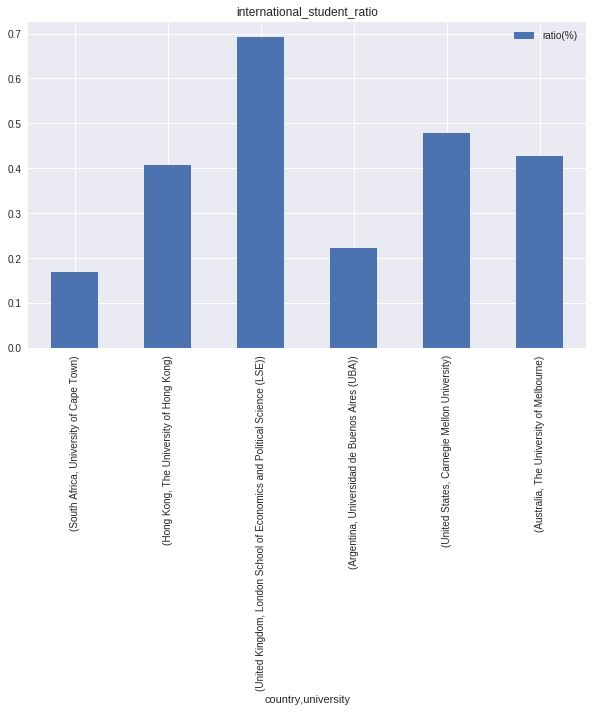

In [18]:
data_ratio_inter_students.sort_values(['ratio(%)'], ascending=False).groupby('region', as_index = False)\
.first().plot(y='ratio(%)', x=['country','university'], kind='bar',\
              grid=True, figsize=(10, 6), title='international_student_ratio')

In [19]:
URL = 'https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
r = requests.get(URL)

In [20]:
universites_info = r.json()['data'][:200]

Obtain the 200 top-ranking universities in www.timeshighereducation.com (ranking 2018). Repeat the analysis of the previous point and discuss briefly what you observed.

In [21]:
data_times = pd.DataFrame([university['rank'] for university in universites_info], columns= ['rank'])
data_times['university'] = [university['name'] for university in universites_info]
data_times['country'] = [university['location'] for university in universites_info]
data_times['proportion of international students(%)'] = [university['stats_pc_intl_students'] for university in universites_info]
data_times['student/staff (%)'] = [university['stats_student_staff_ratio'] for university in universites_info]

proportion of international students(%) by country

In [22]:
data_times.sort_values('proportion of international students(%)', ascending=False).groupby('country').first()

,rank,university,proportion of international students(%),student/staff (%)
country,,,,
Australia,32,University of Melbourne,40%,26.6
Austria,=165,University of Vienna,26%,20.8
Belgium,=175,Université Libre de Bruxelles,35%,43.4
Canada,=34,University of British Columbia,29%,18.1
China,30,Tsinghua University,9%,13.7
Denmark,=153,Technical University of Denmark,24%,6.0
Finland,90,University of Helsinki,6%,16.2
France,115,École Polytechnique,36%,5.1
Germany,=165,University of Würzburg,9%,33.9


student/staff (%) by country

In [23]:
data_times.sort_values('student/staff (%)', ascending=False).groupby('country').first()

,rank,university,proportion of international students(%),student/staff (%)
country,,,,
Australia,65,University of Queensland,26%,35.7
Austria,=165,University of Vienna,26%,20.8
Belgium,=175,Université Libre de Bruxelles,35%,43.4
Canada,78,McMaster University,15%,24.7
China,=27,Peking University,16%,8.9
Denmark,=153,Technical University of Denmark,24%,6.0
Finland,190,Aalto University,20%,20.2
France,=182,École Normale Supérieure de Lyon,13%,8.5
Germany,=100,University of Bonn,13%,77.9


Combine both frames

In [24]:
data_qs = data_qs.rename(columns = {'rank':'rank_qs'})
data_qs.head()

,university,rank_qs,country,region,international students,total students,international faculties,total faculties
0,Massachusetts Institute of Technology (MIT),1,United States,North America,3717,11067,1679,2982
1,Stanford University,2,United States,North America,3611,15878,2042,4285
2,Harvard University,3,United States,North America,5266,22429,1311,4350
3,California Institute of Technology (Caltech),4,United States,North America,647,2255,350,953
4,University of Cambridge,5,United Kingdom,Europe,6699,18770,2278,5490


In [25]:
data_times = data_times.rename(columns = {'rank':'rank_times'})
data_times.head()

,rank_times,university,country,proportion of international students(%),student/staff (%)
0,1,University of Oxford,United Kingdom,38%,11.2
1,2,University of Cambridge,United Kingdom,35%,10.9
2,=3,California Institute of Technology,United States,27%,6.5
3,=3,Stanford University,United States,22%,7.5
4,5,Massachusetts Institute of Technology,United States,34%,8.7


To make both of them, we have to take care of the following things:
1. Some of them are not in English, we should change all of them to English
2. QS use abbreviation such as EPFL, MIT ... etc, we have to remove them to make merging easier

In [26]:
# change French into English
translationTable = str.maketrans("éàèùâêîôûçüäóãÉ", "eaeuaeioucuaoaE")
data_qs['university'] = data_qs.university.apply(lambda x: x.translate(translationTable))
data_times['university'] = data_times.university.apply(lambda x: x.translate(translationTable))

In [27]:
data_qs1 = data_qs.copy()
data_times1 = data_times.copy()

In [28]:
data_qs = data_qs1.copy()
# data_times = data

In [29]:
data_qs.ix[0,'university']

/home/cheng-chun-epfl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


'Massachusetts Institute of Technology (MIT) '

In [30]:
# special case preprocessing

# Trinity College Dublin, The University of Dublin to Trinity College Dublin
data_qs.ix[87, 'university'] = 'Trinity College Dublin'

# QS: KAIST - Korea Advanced Institute of Science & Technology
# times: Korea Advanced Institute of Science and Technology (KAIST)
data_qs.ix[40, 'university'] = \
'Korea Advanced Institute of Science and Technology (KAIST)'

# QS: UCL (University College London) to University College London
data_qs.ix[6, 'university'] = 'University College London'

# QS: KIT, Karlsruhe Institute of Technology to Karlsruhe Institute of Technology
data_qs.ix[106, 'university'] = 'Karlsruhe Institute of Technology'

In [31]:
data_qs2 = data_qs.copy()

In [32]:
def remove_bracket(name):
    ind1 = name.find('(')
    ind2 = name.find(')')
    if ind1 == -1:
        return name
    else:
        while ind2 + 1 < len(name):
            if name[ind2 + 1] == ' ':
                ind2 = ind2 + 1
            else:
                break
        if ind2 + 1 == len(name):
            while ind1 - 1 >= 0:
                if name[ind1 - 1] == ' ':
                    ind1 = ind1 - 1
                else:
                    break
        name = name.replace(name[ind1:ind2+1],'')
        return name

In [369]:
name = 'Korea Advanced Institute of Science and Technology (KAIST)'
remove_bracket(name)

50


'Korea Advanced Institute of Science and Technology'

In [374]:
# remove bracket
data_qs.university = data_qs.university.apply(lambda x: remove_bracket(x))
data_times.university = data_times.university.apply(lambda x: remove_bracket(x))

In [33]:
for university in data_qs.university:
    if university.find('-') != -1:
        print(university)

ETH Zurich - Swiss Federal Institute of Technology
University of Wisconsin-Madison
Ludwig-Maximilians-Universitat Munchen
Ruprecht-Karls-Universitat Heidelberg
University of Illinois at Urbana-Champaign
Humboldt-Universitat zu Berlin
Albert-Ludwigs-Universitaet Freiburg
Alma Mater Studiorum - University of Bologna


In [34]:
for university in data_times.university:
    if university.find('-') != -1:
        print(university)

University of Illinois at Urbana-Champaign
University of Wisconsin-Madison
Charite - Universitatsmedizin Berlin
University of Erlangen-Nuremberg
Paris-Sud University
Paris-Sorbonne University – Paris 4


In [386]:
# data_qs.merge(data_times)
pd.merge(data_qs, data_times, how = 'outer')

,university,rank_qs,country,region,international students,total students,international faculties,total faculties,rank_times,proportion of international students(%),student/staff (%)
0,Massachusetts Institute of Technology,1,United States,North America,3717.0,11067.0,1679.0,2982.0,5,34%,8.7
1,Stanford University,2,United States,North America,3611.0,15878.0,2042.0,4285.0,=3,22%,7.5
2,Harvard University,3,United States,North America,5266.0,22429.0,1311.0,4350.0,6,26%,8.9
3,California Institute of Technology,4,United States,North America,647.0,2255.0,350.0,953.0,=3,27%,6.5
4,University of Cambridge,5,United Kingdom,Europe,6699.0,18770.0,2278.0,5490.0,2,35%,10.9
5,University of Oxford,6,United Kingdom,Europe,7353.0,19720.0,2964.0,6750.0,1,38%,11.2
6,University College London,7,United Kingdom,Europe,14854.0,31080.0,2554.0,6345.0,16,49%,10.5
7,Imperial College London,8,United Kingdom,Europe,8746.0,16090.0,2071.0,3930.0,8,55%,11.4
8,University of Chicago,9,United States,North America,3379.0,13557.0,635.0,2449.0,9,25%,6.2
9,ETH Zurich - Swiss Federal Institute of Techno...,10,Switzerland,Europe,7563.0,19815.0,1886.0,2477.0,NaN,NaN,NaN
